In [74]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS 
import matplotlib.pyplot as plt
import glob

In [75]:
beta1 = 1
beta2 = 1
covariance = 0.5
p = 100
me_cov = 0
N = 100
exp_of_var = 'yes'

In [87]:
for _ in range(100):
    vars_mean = [0,0,0]
    vars_cov = np.array([[1,covariance,0],
                            [covariance,1,0],
                            [0,0,1]])
    # Producing 3 variables: x for the variable of interest, the true Z covariate, the random error
    vars_ = pd.DataFrame(np.random.multivariate_normal(vars_mean, vars_cov, N), columns = ['x','true_z','u'])
    vars_['y'] = beta1 * vars_['x'] + beta2 * vars_['true_z'] + vars_['u']

    # Create measurement errors for each of the p measurements of the covariates- mean zero and variance one
    errors_mean = np.zeros(p)
    errors_cov = np.zeros((p,p))
    if me_cov != 0:
        errors_cov[:] = me_cov
    for i in range(p):
        for j in range(p):
            if i == j:
                errors_cov[i,j] = 1
            

    errors = np.random.multivariate_normal(errors_mean, errors_cov, N)
    # Column labels for Z variables (covariates variables mismeasured)
    z_vars = []
    for i in range(p):
        z_vars.append('z'+str(i+1))
    # Add errors to the true_z to get mismeasured values
    mismeasured_z = pd.DataFrame(errors, columns = z_vars)
    for i in mismeasured_z.columns:
        mismeasured_z[i] = mismeasured_z[i] + vars_['true_z']

    # Take e to the power of the values for half of the measurements if exp_of_var is true
    if exp_of_var == 'yes':
        mismeasured_z.iloc[:,int(len(mismeasured_z.columns)/2):] =np.exp(mismeasured_z.iloc[:,int(len(mismeasured_z.columns)/2):])

    # Do feature scaling (normalize to mean 0 and variance 1) for the mismeasured z
    # Note that x and y are already normalized by construction
    scaled_mismeasured_z = mismeasured_z.copy()
    for i in mismeasured_z.columns:
        scaled_mismeasured_z[i] = (mismeasured_z[i] - mismeasured_z[i].mean()) / mismeasured_z[i].std()

    avg = scaled_mismeasured_z.mean(axis = 1)
    print(avg.std())

0.685770409624478
0.7104914587651415
0.6857486776622312
0.6675176726426523
0.7558886862067946
0.7139540450124896
0.648293935896897
0.6906889641242308
0.7295379412911014
0.7210886558882023
0.6860099258836001
0.7252825866197158
0.7066096566066165
0.6779565748798219
0.7369276518008034
0.6687286704796372
0.7390144161502379
0.7314584052477336
0.6566786444680407
0.7336820040241488
0.7053652414486878
0.7058872806029206
0.6676147972404229
0.7297396396890563
0.7433201929130521
0.7041252443889573
0.6823018634508402
0.6825958234307349
0.7283987318022288
0.7054506483932081
0.677844374800835
0.7098346369214961
0.6451358692526854
0.6917204131767497
0.7260315138631842
0.7282640480507508
0.7242880139987077
0.7256441867409262
0.6936963614282102
0.7445755604152186
0.7159545643859789
0.6826906644196078
0.7163595847414114
0.7447468868686947
0.6935796499909341
0.6887300148024752
0.7308153090662372
0.7193111465905736
0.7258446974678471
0.7369804932786254
0.6705977804604002
0.7231591755673771
0.6812806471527

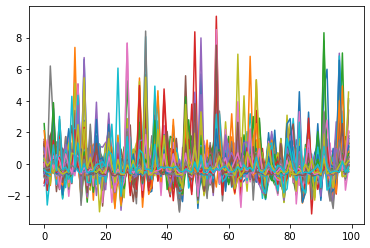

In [77]:
plt.plot(scaled_mismeasured_z)

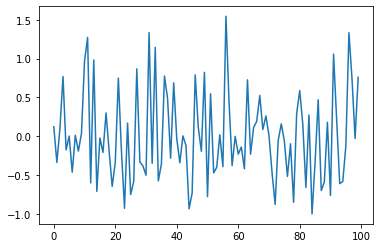

In [78]:
plt.plot(avg)

In [79]:
avg.mean()

1.3322676295501878e-17

In [80]:
avg.std()

0.5827393112052988

In [81]:
exp_of_var = 'no'

In [88]:
for _ in range(100):
    vars_mean = [0,0,0]
    vars_cov = np.array([[1,covariance,0],
                            [covariance,1,0],
                            [0,0,1]])
    # Producing 3 variables: x for the variable of interest, the true Z covariate, the random error
    vars_ = pd.DataFrame(np.random.multivariate_normal(vars_mean, vars_cov, N), columns = ['x','true_z','u'])
    vars_['y'] = beta1 * vars_['x'] + beta2 * vars_['true_z'] + vars_['u']

    # Create measurement errors for each of the p measurements of the covariates- mean zero and variance one
    errors_mean = np.zeros(p)
    errors_cov = np.zeros((p,p))
    if me_cov != 0:
        errors_cov[:] = me_cov
    for i in range(p):
        for j in range(p):
            if i == j:
                errors_cov[i,j] = 1
            

    errors = np.random.multivariate_normal(errors_mean, errors_cov, N)
    # Column labels for Z variables (covariates variables mismeasured)
    z_vars = []
    for i in range(p):
        z_vars.append('z'+str(i+1))
    # Add errors to the true_z to get mismeasured values
    mismeasured_z = pd.DataFrame(errors, columns = z_vars)
    for i in mismeasured_z.columns:
        mismeasured_z[i] = mismeasured_z[i] + vars_['true_z']

    # Take e to the power of the values for half of the measurements if exp_of_var is true
    if exp_of_var == 'yes':
        mismeasured_z.iloc[:,int(len(mismeasured_z.columns)/2):] =np.exp(mismeasured_z.iloc[:,int(len(mismeasured_z.columns)/2):])

    # Do feature scaling (normalize to mean 0 and variance 1) for the mismeasured z
    # Note that x and y are already normalized by construction
    scaled_mismeasured_z = mismeasured_z.copy()
    for i in mismeasured_z.columns:
        scaled_mismeasured_z[i] = (mismeasured_z[i] - mismeasured_z[i].mean()) / mismeasured_z[i].std()

    avg = scaled_mismeasured_z.mean(axis = 1)
    print(avg.std())

0.7240449303682363
0.6995918959011065
0.7301363550086375
0.698682633013739
0.7555039506152941
0.7110222178290037
0.7011685650987337
0.7401244942456905
0.6442745683669502
0.7136533443959955
0.7165641099971849
0.7238295455431588
0.678123267791723
0.6982636651288197
0.7011141383899395
0.7000568289466007
0.6848839323275442
0.7156677866594928
0.7158985007978351
0.7380786313275683
0.7292219708563402
0.7505474684318915
0.6886124929925047
0.681236480888052
0.6745428955478139
0.6684151085338484
0.7248604742333816
0.7075296884699614
0.7186451955181954
0.7183975028249402
0.7036467238277108
0.6653543072695317
0.6783545025841053
0.7010724578021817
0.6776671590003143
0.6850248208526728
0.7137486685780522
0.7621539137865428
0.6777638790068813
0.7192596597711852
0.6977034620767324
0.7006366474256366
0.6937657207807347
0.7138030606361564
0.6486620473231101
0.6634116809717747
0.7227113257946302
0.6745100041072473
0.7493463564775042
0.7109241282828005
0.7345708912312672
0.6621270905943405
0.6637503584663

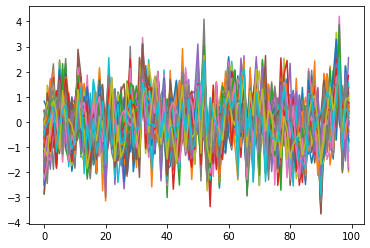

In [83]:
plt.plot(scaled_mismeasured_z)

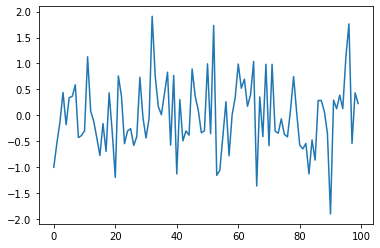

In [84]:
plt.plot(avg)

In [85]:
avg.mean()

1.0824674490095277e-17

In [86]:
avg.std()

0.6859741622130915